In [1]:
import matplotlib.pyplot as plt 
import seaborn as sns
import numpy as np
import pandas as pd
from datetime import datetime
import os
from scipy.signal import savgol_filter, chirp, find_peaks, peak_widths
from matplotlib.ticker import MultipleLocator, FormatStrFormatter
%config InlineBackend.figure_format='retina'
params = {'mathtext.default': 'regular' }          
plt.rcParams.update(params)
sns.set_style("ticks")

now = datetime.now()
dt_string = now.strftime("%Y/%m/%d %H:%M:%S")
print("Last update =", dt_string)	

Last update = 2022/04/19 17:30:55


In [2]:
#path names-win
path_1 = '../Exp-1/data/train/obs/train_dataset.csv'
path_2 = '../Exp-1/data/valid/valid_dataset.csv'

#settings
kwargs = dict(header=0, index_col=0, parse_dates=False, squeeze=True)

#import csv files
df1 = pd.read_csv(path_1, **kwargs)
df2 = pd.read_csv(path_2, **kwargs)

In [3]:
df1['Datetime'] = pd.to_datetime(df1.index, format = '%Y-%m-%d %H:%M')
df1['date'] = df1['Datetime'].dt.strftime('%d')
df1.index = pd.to_datetime(df1.index, format = '%Y-%m-%d %H:%M')

df2['Datetime'] = pd.to_datetime(df2.index, format = '%Y-%m-%d %H:%M')
df2['date'] = df2['Datetime'].dt.strftime('%d')
df2.index = pd.to_datetime(df2.index, format = '%Y-%m-%d %H:%M')

In [4]:
df1

,NH3_N,sin_hour,cos_hour,sin_day,cos_day,Datetime,date
Datetime,,,,,,,
2021-12-23 00:00:00,0.195660,0.000000,1.000000,-0.994522,0.104528,2021-12-23 00:00:00,23
2021-12-23 01:00:00,0.196276,0.258819,0.965926,-0.994522,0.104528,2021-12-23 01:00:00,23
2021-12-23 02:00:00,0.209842,0.500000,0.866025,-0.994522,0.104528,2021-12-23 02:00:00,23
2021-12-23 03:00:00,0.213017,0.707107,0.707107,-0.994522,0.104528,2021-12-23 03:00:00,23
2021-12-23 04:00:00,0.214757,0.866025,0.500000,-0.994522,0.104528,2021-12-23 04:00:00,23
...,...,...,...,...,...,...,...
2022-01-09 19:00:00,0.730879,-0.965926,0.258819,0.951057,-0.309017,2022-01-09 19:00:00,09
2022-01-09 20:00:00,0.775983,-0.866025,0.500000,0.951057,-0.309017,2022-01-09 20:00:00,09
2022-01-09 21:00:00,0.674130,-0.707107,0.707107,0.951057,-0.309017,2022-01-09 21:00:00,09


In [5]:
import plotly.express as px
fig = px.scatter_3d(df1, x='NH3_N', y='sin_hour', z='cos_hour',
              color='date')
fig.show()

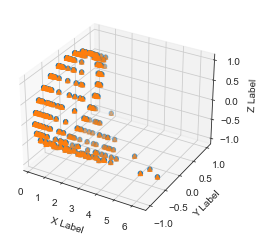

In [6]:
import matplotlib.pyplot as plt
import numpy as np

# Fixing random state for reproducibility
np.random.seed(19680801)


def randrange(n, vmin, vmax):
    """
    Helper function to make an array of random numbers having shape (n, )
    with each number distributed Uniform(vmin, vmax).
    """
    return (vmax - vmin)*np.random.rand(n) + vmin

fig = plt.figure()
ax = fig.add_subplot(projection='3d')

n = 100

# For each set of style and range settings, plot n random points in the box
# defined by x in [23, 32], y in [0, 100], z in [zlow, zhigh].
for m, zlow, zhigh in [('o', -50, -25), ('^', -30, -5)]:
    xs = df1.iloc[:,0]
    ys = df1.iloc[:,1]
    zs = df1.iloc[:,2]
    ax.scatter(xs, ys, zs, marker=m)

ax.set_xlabel('X Label')
ax.set_ylabel('Y Label')
ax.set_zlabel('Z Label')

plt.show()

In [7]:
import plotly.graph_objects as go
import numpy as np

# Helix equation

fig = go.Figure(data=[go.Scatter3d(x=df1.iloc[:,0], y=df1.iloc[:,1], z=df1.iloc[:,2],
                                   mode='markers')])
fig.show()

In [8]:
df1['day'] = df1['Datetime'].day()

AttributeError: 'Series' object has no attribute 'day'

In [ ]:
import plotly.express as px
df = px.data.iris()
fig = px.scatter_3d(df, x='sepal_length', y='sepal_width', z='petal_width',
              color='species')
fig.show()

In [ ]:
df1

,NH3_N,sin_hour,cos_hour,sin_day,cos_day,Datetime,date
Datetime,,,,,,,
2021-12-23 00:00:00,0.195660,0.000000,1.000000,-0.994522,0.104528,2021-12-23 00:00:00,23
2021-12-23 01:00:00,0.196276,0.258819,0.965926,-0.994522,0.104528,2021-12-23 01:00:00,23
2021-12-23 02:00:00,0.209842,0.500000,0.866025,-0.994522,0.104528,2021-12-23 02:00:00,23
2021-12-23 03:00:00,0.213017,0.707107,0.707107,-0.994522,0.104528,2021-12-23 03:00:00,23
2021-12-23 04:00:00,0.214757,0.866025,0.500000,-0.994522,0.104528,2021-12-23 04:00:00,23
...,...,...,...,...,...,...,...
2022-01-09 19:00:00,0.730879,-0.965926,0.258819,0.951057,-0.309017,2022-01-09 19:00:00,09
2022-01-09 20:00:00,0.775983,-0.866025,0.500000,0.951057,-0.309017,2022-01-09 20:00:00,09
2022-01-09 21:00:00,0.674130,-0.707107,0.707107,0.951057,-0.309017,2022-01-09 21:00:00,09


In [ ]:
import chart_studio.plotly  as py
import plotly.graph_objs as go
import plotly.tools as tls
import numpy as np

In [ ]:
Z1 = np.cos(X)*np.sin(Y)
Z2 = 2 + np.cos(X)*np.sin(Y)

NameError: name 'X' is not defined

In [ ]:
trace1 = go.Surface(z=Z1, colorscale='Viridis')
py.iplot([trace1])

NameError: name 'Z1' is not defined

In [ ]:
df1

,NH3_N,sin_hour,cos_hour,sin_day,cos_day,Datetime,date
Datetime,,,,,,,
2021-12-23 00:00:00,0.195660,0.000000,1.000000,-0.994522,0.104528,2021-12-23 00:00:00,23
2021-12-23 01:00:00,0.196276,0.258819,0.965926,-0.994522,0.104528,2021-12-23 01:00:00,23
2021-12-23 02:00:00,0.209842,0.500000,0.866025,-0.994522,0.104528,2021-12-23 02:00:00,23
2021-12-23 03:00:00,0.213017,0.707107,0.707107,-0.994522,0.104528,2021-12-23 03:00:00,23
2021-12-23 04:00:00,0.214757,0.866025,0.500000,-0.994522,0.104528,2021-12-23 04:00:00,23
...,...,...,...,...,...,...,...
2022-01-09 19:00:00,0.730879,-0.965926,0.258819,0.951057,-0.309017,2022-01-09 19:00:00,09
2022-01-09 20:00:00,0.775983,-0.866025,0.500000,0.951057,-0.309017,2022-01-09 20:00:00,09
2022-01-09 21:00:00,0.674130,-0.707107,0.707107,0.951057,-0.309017,2022-01-09 21:00:00,09


In [ ]:
df1['NH3_N']['2022-1-7 00:00':'2022-1-7 23:00']

Datetime
2022-01-07 00:00:00    0.337140
2022-01-07 01:00:00    0.339028
2022-01-07 02:00:00    0.360314
2022-01-07 03:00:00    0.383053
2022-01-07 04:00:00    0.357138
2022-01-07 05:00:00    0.340120
2022-01-07 06:00:00    0.330979
2022-01-07 07:00:00    0.323969
2022-01-07 08:00:00    0.319971
2022-01-07 09:00:00    0.387879
2022-01-07 10:00:00    0.882202
2022-01-07 11:00:00    1.596980
2022-01-07 12:00:00    2.472594
2022-01-07 13:00:00    2.696873
2022-01-07 14:00:00    2.327729
2022-01-07 15:00:00    1.635689
2022-01-07 16:00:00    0.949148
2022-01-07 17:00:00    0.567940
2022-01-07 18:00:00    0.501239
2022-01-07 19:00:00    0.829431
2022-01-07 20:00:00    1.584185
2022-01-07 21:00:00    2.017660
2022-01-07 22:00:00    1.982508
2022-01-07 23:00:00    1.573664
Name: NH3_N, dtype: float64

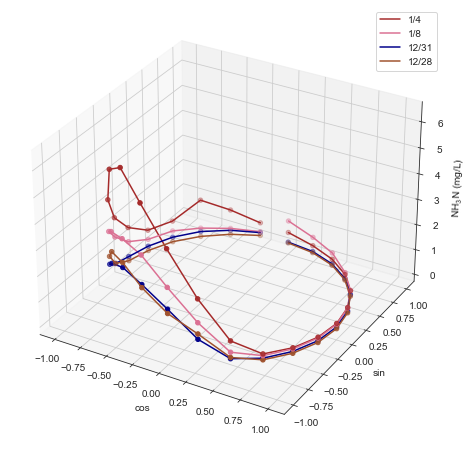

In [9]:
import numpy as np
import matplotlib.pyplot as plt
%config InlineBackend.figure_format = 'retina'

params = {'mathtext.default': 'regular' }          
plt.rcParams.update(params)
sns.set_style("ticks")

# 建立 3D 圖形
fig = plt.figure(figsize=(8,8))
ax = fig.add_subplot(projection='3d')

# 產生 3D 座標資料
# 12/31, 1/4, 1/8
z1 = df1['NH3_N']['2022-1-4']
x1 = df1['sin_hour']['2022-1-4']
y1 = df1['cos_hour']['2022-1-4']

ax.plot(x1, y1, z1, color='brown', label='1/4')
ax.scatter(x1, y1, z1, color='brown')

z2 = df1['NH3_N']['2022-1-8']
x2 = df1['sin_hour']['2022-1-8']
y2 = df1['cos_hour']['2022-1-8']

ax.plot(x2, y2, z2, color='palevioletred', label='1/8')
ax.scatter(x2, y2, z2, c='palevioletred')

z3 = df1['NH3_N']['2021-12-31']
x3 = df1['sin_hour']['2021-12-31']
y3 = df1['cos_hour']['2021-12-31']

ax.plot(x3, y3, z3, color='darkblue', label='12/31')
ax.scatter(x3, y3, z3, c='darkblue')

z4 = df1['NH3_N']['2021-12-28']
x4 = df1['sin_hour']['2021-12-28']
y4 = df1['cos_hour']['2021-12-28']

ax.plot(x4, y4, z4, color='sienna', label='12/28')
ax.scatter(x4, y4, z4, c='sienna')

ax.set_xlabel('cos')
ax.set_ylabel('sin')
ax.set_zlabel('NH$_{3}$N (mg/L)')
# 顯示圖例
ax.legend()

# 顯示圖形
plt.show()

In [11]:
# 3d scatterplot using plotly
Scene = dict(xaxis = dict(title  = 'Mean -->'),yaxis = dict(title  = 'Sum--->'),zaxis = dict(title  = 'Std-->'))

# model.labels_ is nothing but the predicted clusters i.e y_clusters
trace = go.Scatter3d(x=df1.iloc[:, 0], y=df1.iloc[:, 1], z=df1.iloc[:, 2], mode='markers',marker=dict(size= 5, line=dict(color= 'black',width = 10)),text=df1['date'])
layout = go.Layout(margin=dict(l=0,r=0),scene = Scene,height = 800,width = 800)
data = [trace]
fig = go.Figure(data = data, layout = layout)
fig.show()